**Oil Prices VS GDP of Oil exporting countries**<br>
Plot average gdp values of oil exporting countries from 2000 to 2022<br>
Plot the Adjusted crudeoil price per barrel from year 2000 to 2022<br>

In [1]:
# import necessary libaries for data aggregation and visualization
import pandas as pd  # for data aggregation 
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import re # for regex
import numpy as np


In [2]:
# Load oil exporting countries dataset for data aggregation
oil_countries = pd.read_csv("/home/ridwanullahi/Desktop/Work_Space/Play/oil-impact/data/processed/gdp/oil_states/oil_producer_gdp.csv")
print("Oil Producing countries GDP dataset")
oil_countries.head(10)
oil_countries.tail(10)

Oil Producing countries GDP dataset


,country_name,country_code,currency,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
87,Turkey,TUR,GDP (current US$),2.742948e+11,2.017531e+11,2.402490e+11,3.145955e+11,4.088654e+11,5.063147e+11,5.570760e+11,...,9.577990e+11,9.389344e+11,8.643140e+11,8.696830e+11,8.589886e+11,7.784767e+11,7.599348e+11,7.202888e+11,8.190345e+11,9.059878e+11
88,Turkmenistan,TKM,GDP (current US$),2.904663e+09,3.534772e+09,4.462029e+09,5.977441e+09,6.838351e+09,8.103902e+09,1.027667e+10,...,3.919754e+10,4.352421e+10,3.579971e+10,3.616943e+10,3.792629e+10,4.076543e+10,4.422029e+10,4.561057e+10,NaN,NaN
89,Ukraine,UKR,GDP (current US$),3.237508e+10,3.930958e+10,4.395616e+10,5.201035e+10,6.722015e+10,8.923887e+10,1.118848e+11,...,1.904988e+11,1.335039e+11,9.103097e+10,9.335587e+10,1.120905e+11,1.308911e+11,1.538830e+11,1.566177e+11,1.997659e+11,1.605027e+11
90,United Arab Emirates,ARE,GDP (current US$),1.043374e+11,1.033116e+11,1.098162e+11,1.243464e+11,1.478244e+11,1.806175e+11,2.221165e+11,...,4.002185e+11,4.141054e+11,3.702755e+11,3.692553e+11,3.905168e+11,4.270494e+11,4.179897e+11,3.494730e+11,4.150216e+11,5.075349e+11
91,United Kingdom,GBR,GDP (current US$),1.666049e+12,1.648765e+12,1.785781e+12,2.056705e+12,2.423047e+12,2.544813e+12,2.709978e+12,...,2.786315e+12,3.065223e+12,2.934858e+12,2.699660e+12,2.683489e+12,2.878152e+12,2.857058e+12,2.704609e+12,3.122480e+12,3.070668e+12
92,United States,USA,GDP (current US$),1.025095e+13,1.058193e+13,1.092911e+13,1.145644e+13,1.221719e+13,1.303920e+13,1.381559e+13,...,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13,2.546270e+13
93,Uzbekistan,UZB,GDP (current US$),1.376051e+10,1.140142e+10,9.687789e+09,1.013445e+10,1.203002e+10,1.430751e+10,1.733083e+10,...,7.318004e+10,8.084539e+10,8.619626e+10,8.613829e+10,6.208132e+10,5.287011e+10,6.028350e+10,6.022470e+10,6.960061e+10,8.039185e+10
94,Venezuela,VEN,GDP (current US$),1.171465e+11,1.229110e+11,9.289359e+10,8.362063e+10,1.124514e+11,1.455135e+11,1.834775e+11,...,3.710054e+11,4.823593e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Vietnam,VNM,GDP (current US$),3.117252e+10,3.268520e+10,3.506411e+10,3.955251e+10,4.542785e+10,5.763326e+10,6.637166e+10,...,2.137088e+11,2.334515e+11,2.392583e+11,2.570960e+11,2.813536e+11,3.101065e+11,3.343653e+11,3.466158e+11,3.661376e+11,4.088024e+11
96,Yemen,YEM,GDP (current US$),9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674635e+10,1.906198e+10,...,4.041523e+10,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN


In [3]:
# Import oil price dataset for comparison
oil_price = pd.read_csv("/home/ridwanullahi/Desktop/Work_Space/Play/oil-impact/data/processed/oil_price/avg_oil_price.csv")
print("Oil Price dataset") 
oil_price.head(10)
oil_price.tail(15)

Oil Price dataset


,Year,Avg_Price($)
9,2009,63.923333
10,2010,79.985000
11,2011,97.001667
12,2012,94.051667
13,2013,97.607500
14,2014,91.227500
15,2015,49.307500
16,2016,44.468333
17,2017,51.855000
18,2018,64.589742


In [4]:
years = [str(i) for i in range(2000, 2023)]
gdp_avg = oil_countries[years].mean().to_list()


gdp_avg_df = pd.DataFrame({
    "year": years,
    "gdp_avg": gdp_avg
    
})
gdp_avg_df.head()

# transform  gdp_avg to billions
gdp_avg_df["gdp_avg"] = gdp_avg_df["gdp_avg"].apply(lambda x: round(x/1e9, 2))
# Rename gdp of oil gdp_avg year column to "Year"
gdp_avg_df.rename(columns = {"year": "Year", "gdp_avg": "gdp_avg(Billion $)"},inplace = True)

# Change data type of Year column to int
gdp_avg_df["Year"] = gdp_avg_df["Year"].astype(int)
gdp_avg_df.head()


,Year,gdp_avg(Billion $)
0,2000,325.10
1,2001,323.41
2,2002,334.80
3,2003,374.88
4,2004,422.41


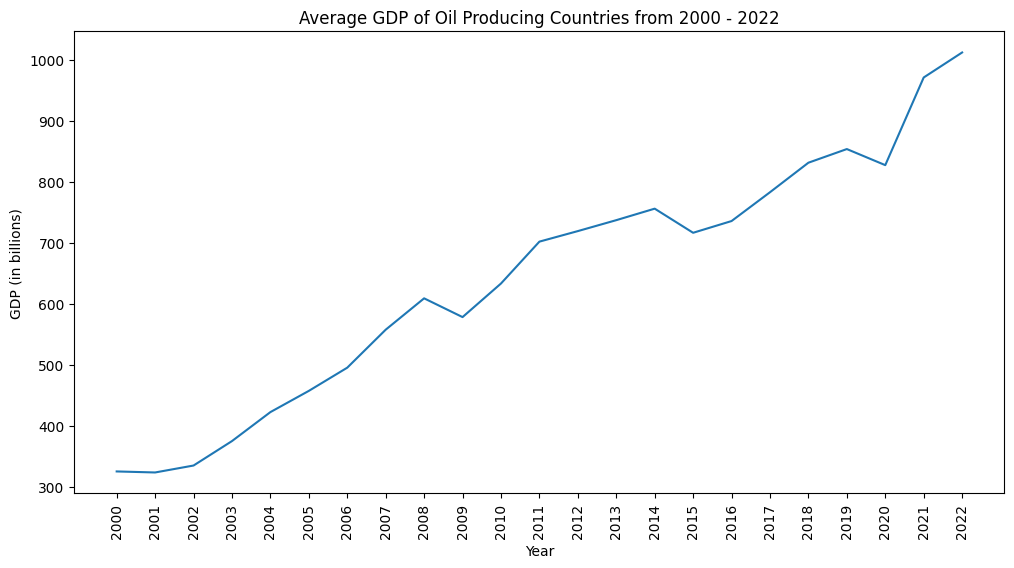

In [6]:
# Plot the average GDP of oil producing countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_avg_df, x="Year", y="gdp_avg")
plt.title("Average GDP of Oil Producing Countries from 2000 - 2022")
plt.xlabel("Year")
plt.ylabel("GDP (in billions)")
plt.xticks(rotation=90)
plt.show()

In [14]:
# Import average crude oil price dataset
oil_price = pd.read_csv("../data/processed/avg_oil_price.csv")
print("Average Crude Oil Price: 2000 - 2022")
#check the data types of the columns
oil_price.dtypes


Average Crude Oil Price: 2000 - 2022


Year              int64
Avg_Price($)    float64
dtype: object

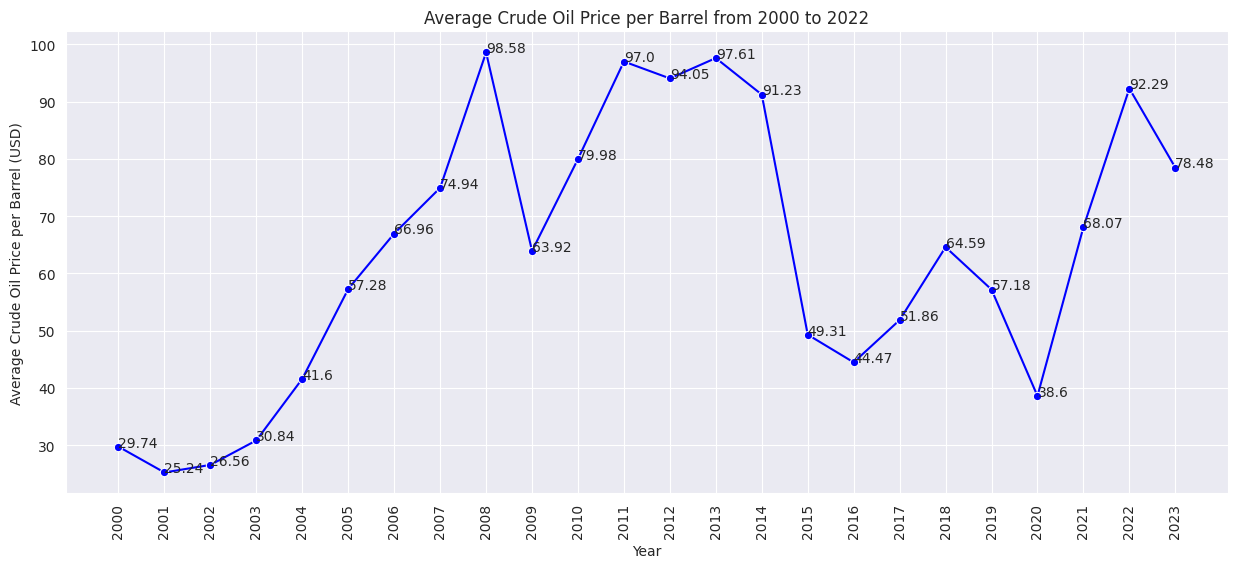

In [8]:
# Plot the average crude oil prices
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
sns.lineplot(
    data=oil_price, x="Year", y="Avg_Price($)", marker="o", color="blue"
)
plt.xlabel("Year")
plt.ylabel("Average Crude Oil Price per Barrel (USD)")
plt.title("Average Crude Oil Price per Barrel from 2000 to 2022")
for i in range(len(oil_price)):
    plt.text(oil_price["Year"].iloc[i], oil_price["Avg_Price($)"].iloc[i], round(oil_price["Avg_Price($)"].iloc[i], 2))
plt.xticks(range(min(oil_price["Year"]), max(oil_price["Year"]) + 1), rotation=90)
plt.show()

In [5]:
# merge the two datasets together for comparison
gdp_avg_vs_avg_oil_price = pd.merge(gdp_avg_df, oil_price, on="Year", how="left")
gdp_avg_vs_avg_oil_price.head()

,Year,gdp_avg(Billion $),Avg_Price($)
0,2000,325.10,29.744167
1,2001,323.41,25.238333
2,2002,334.80,26.562500
3,2003,374.88,30.837500
4,2004,422.41,41.598333


<Figure size 1000x300 with 0 Axes>

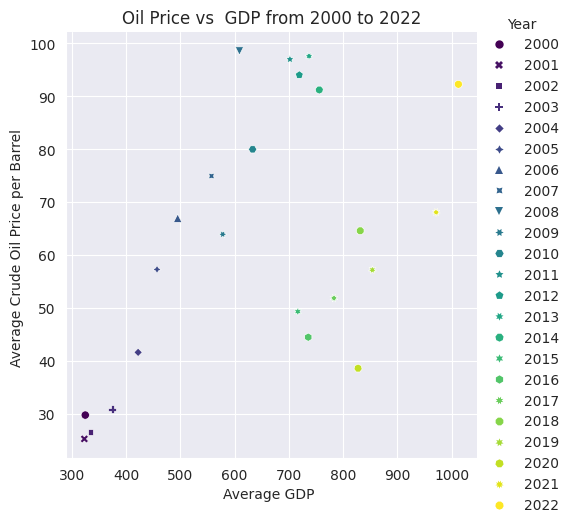

In [21]:

# plot the relationship between average GDP and average crude oil price over the years
plt.figure(figsize=(10, 3))
sns.set_style("darkgrid")
sns.relplot(data=gdp_avg_vs_avg_oil_price, x="gdp_avg(Billion $)", y="Avg_Price($)", hue="Year", palette="viridis",style="Year", legend="full")
plt.xlabel("Average GDP ")
plt.ylabel("Average Crude Oil Price per Barrel ")
plt.title("Oil Price vs  GDP from 2000 to 2022")
plt.show()
